#**NAMA : IRMA OCTAVIA CHANIAGO**

#**DOMISILI : KOTA SURABAYA**

In [16]:
# Import library yang sekiranya dibutuhkan (biar ga lupa ajah)
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from google.colab import files
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Import dataset
uploaded = files.upload()

Saving Data (1).csv to Data (1).csv


In [5]:
df = pd.read_csv('Data (1).csv')
df

,bully,tweet,individual,group,gender,physical,race,religion
0,no,USER terimakasih Ustadz sudah bersuara tentang...,0,0,0,0,0,0
1,no,USER USER Maaf sebenarnya twiter pertama kali ...,0,0,0,0,0,0
2,yes,USER Anjing tai goblok idiot bangsat monyet ba...,1,0,1,1,0,0
3,no,"Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...",0,0,0,0,0,0
4,yes,USER USER USER yg kaya gini layak di tangkap.,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10530,yes,USER USER USER kyak dah lahir aja ngomong soeh...,0,1,0,0,0,0
10531,yes,USER USER USER USER USER Pencitraan Lu...ah......,1,0,0,0,0,0
10532,yes,USER USER USER USER USER cebong doang yg tukan...,0,1,0,0,0,0
10533,yes,USER BIASA LAH PROF KAUM KAMBING BENGEK YA BEG...,0,1,0,0,0,0


In [15]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bully       10535 non-null  object
 1   tweet       10535 non-null  object
 2   individual  10535 non-null  int64 
 3   group       10535 non-null  int64 
 4   gender      10535 non-null  int64 
 5   physical    10535 non-null  int64 
 6   race        10535 non-null  int64 
 7   religion    10535 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 658.6+ KB


In [36]:
# Cek sekali lagi apakah data termasuk one-hot encoded atau tidak
(label_latih[:10])

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

##**Data cleaning**


In [17]:
# Membuat fungsi untuk membersihkan tweet
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

In [18]:
# def filteringText(text): # Remove stopwors in a text
#     listStopwords = set(stopwords.words('indonesian'))
#     filtered = []
#     for txt in text:
#         if txt not in listStopwords:
#             filtered.append(txt)
#     text = filtered
#     return text

Pada fungsi yang ditutup dalam bentuk komentar seperti stemmingText tersebut tidak saya digunakan. Dikarenakan terdapat kendala saat saya melakukan stemming yakni memakan waktu yang cukup lama dalam prosesnya.

Selanjutnya, disini kami menggunakan stopwords sendiri untuk menghapus beberapa kata yang tidak begitu penting dengan memberikan variabel dengan nama stopwords.

In [19]:
stopword=['gue','gw','user','gak','gk','yang','yg','lu','ya','si','jd','jadi','apa','ap','ama','iya','lbh',
         'jd','kalo','klo','tdk','tidak','nya','ny','tuh','sih','sdh','udah','udh','langsung','mah','bang',
         'url','loe','lo','deh','dh','tp','tapi','emg','emang','ah','aja','aj','ke','dah','eh','gimana',
         'jg','juga','jgn','g','ga','nih','ni','tu', 'banget','bgt','gk','harus','hrs','biar','gini','ttp',
         'dr','dari','dri','ente','tentang','ttg','sudah','di', 'amp','semua','kalau','tau','lg','karna',
         'mau','masih','msh','cuma','cm','sj','saja','dengan','dgn','dlu','dulu','dl','sok','karena','luh',
         'kan','it','itu','buat','tak','oleh','km','kamu','kmu','kali','kayak','bikin','bkn','loh','bener',
         'trus','terus','gua','dasar','kau','orang','liat','lihat','masuk','org','ulang','wkwkwk','gmnin',
         'dapat','dpt','pd','pada','x','isi','itu','it','kek','spt','suka','mending','jan','hauahahaha','o',
         'wes','sisan','gih','woy','woii','aje','rp','klw','mudah','ngapain','kek','skrg','sby','lbh','mrk',
         'ngak','bang','habishabisan','hp','sgala','segala','pake','pke','ttp','hti','elo','ta','wk','cari',
         'udik','haha','sampe','kl','ma','dsna','stlh','setelah','ajk','ajak']

Membuat kolom baru dengan nama text_clean untuk tweet yang telah dibersihkan dan diubah menjadi huruf kecil semua

In [21]:
df['text_clean'] = df['tweet'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.head()

,bully,tweet,individual,group,gender,physical,race,religion,text_clean
0,no,USER terimakasih Ustadz sudah bersuara tentang...,0,0,0,0,0,0,user terimakasih ustadz sudah bersuara tentang...
1,no,USER USER Maaf sebenarnya twiter pertama kali ...,0,0,0,0,0,0,user user maaf sebenarnya twiter pertama kali ...
2,yes,USER Anjing tai goblok idiot bangsat monyet ba...,1,0,1,1,0,0,user anjing tai goblok idiot bangsat monyet ba...
3,no,"Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...",0,0,0,0,0,0,hadiri lokakarya kebudayaan daerah bupati rupi...
4,yes,USER USER USER yg kaya gini layak di tangkap.,1,0,0,0,0,0,user user user yg kaya gini layak di tangkap


Membuat kolom baru dengan nama text_clean2 untuk menampilkan tweet yang telah dibersihkan dengan menghilangkan kata dari variabel stopword

In [22]:
def clean_key(text):
    text=' '.join(word for word in text.split() if word not in stopword)
    return text
df['text_clean2'] = df['text_clean'].apply(clean_key)
df.head()

,bully,tweet,individual,group,gender,physical,race,religion,text_clean,text_clean2
0,no,USER terimakasih Ustadz sudah bersuara tentang...,0,0,0,0,0,0,user terimakasih ustadz sudah bersuara tentang...,terimakasih ustadz bersuara radikal radikal in...
1,no,USER USER Maaf sebenarnya twiter pertama kali ...,0,0,0,0,0,0,user user maaf sebenarnya twiter pertama kali ...,maaf sebenarnya twiter pertama dbuat bukan bego
2,yes,USER Anjing tai goblok idiot bangsat monyet ba...,1,0,1,1,0,0,user anjing tai goblok idiot bangsat monyet ba...,anjing tai goblok idiot bangsat monyet babi fu...
3,no,"Hadiri Lokakarya Kebudayaan Daerah, Bupati Rup...",0,0,0,0,0,0,hadiri lokakarya kebudayaan daerah bupati rupi...,hadiri lokakarya kebudayaan daerah bupati rupi...
4,yes,USER USER USER yg kaya gini layak di tangkap.,1,0,0,0,0,0,user user user yg kaya gini layak di tangkap,kaya layak tangkap


In [28]:
# Menghapus kolom yang tidak diperlukan dan mengganti nama tabel baru
columns_to_drop = ['bully', 'tweet', 'text_clean']
data = df.drop(columns=columns_to_drop)
data = data.rename(columns={'text_clean2': 'tweet'})
data

,individual,group,gender,physical,race,religion,tweet
0,0,0,0,0,0,0,terimakasih ustadz bersuara radikal radikal in...
1,0,0,0,0,0,0,maaf sebenarnya twiter pertama dbuat bukan bego
2,1,0,1,1,0,0,anjing tai goblok idiot bangsat monyet babi fu...
3,0,0,0,0,0,0,hadiri lokakarya kebudayaan daerah bupati rupi...
4,1,0,0,0,0,0,kaya layak tangkap
...,...,...,...,...,...,...,...
10530,0,1,0,0,0,0,kyak lahir ngomong soeharto l keahlian cebong ...
10531,1,0,0,0,0,0,pencitraan luahprabowo tidur
10532,0,1,0,0,0,0,cebong doang tukang ngamuk
10533,0,1,0,0,0,0,biasa lah prof kaum kambing bengek begitu beda...


In [42]:
# Merubah data kedalam bentuk numpy array
tweet = data['tweet'].values
label = data[['individual', 'group', 'gender', 'physical', 'race', 'religion']].values

In [43]:
# Membagi data training dan testing
tweet_latih, tweet_test, label_latih, label_test = train_test_split(tweet, label, test_size=0.2)

Kemudian saya ubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, saya perlu membuat mengonversi setiap sampel menjadi sequence.

In [44]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_latih)
tokenizer.fit_on_texts(tweet_test)

sekuens_latih = tokenizer.texts_to_sequences(tweet_latih)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)


MAX_SEQUENCE_LENGTH = max(len(seq) for seq in sekuens_latih + sekuens_test)
padded_latih = pad_sequences(sekuens_latih, maxlen=MAX_SEQUENCE_LENGTH)
padded_test = pad_sequences(sekuens_test, maxlen=MAX_SEQUENCE_LENGTH)

Untuk arsitektur model saya menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer.

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.LSTM(6, dropout=0.2, recurrent_dropout=0.2),  # Menambahkan dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

Menggunakan fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

Saya menggunakan fungsi loss 'categorical_crossentropy' karena berada dalam kasus di mana saya memiliki tugas klasifikasi multikelas dan labelnya dalam bentuk one-hot encoded.

In [86]:
# Menggunakan optimizer Adam dengan learning rate yang lebih rendah
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [87]:
# Gunakan fungsi callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print("\nAkurasi telah mencapai >80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [88]:
history = model.fit(padded_latih, label_latih, epochs=30,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30

Akurasi telah mencapai >80%!
264/264 - 28s - loss: 0.9425 - accuracy: 0.8240 - val_loss: 0.8425 - val_accuracy: 0.8581 - 28s/epoch - 106ms/step


##**Visualisasi**


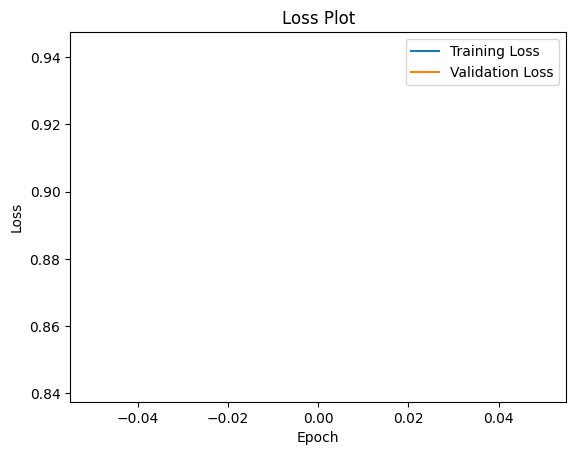

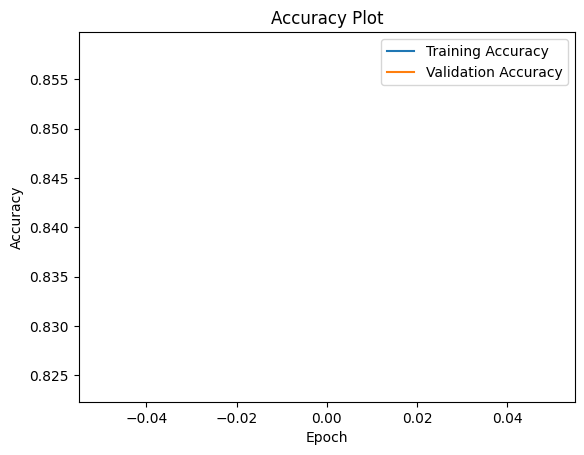

In [89]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dikarenakan output yang saya hasilkan hanya memiliki 1 nilai saja, maka dari itu pembentukan plot sulit dibentuk.

#**Berikut jika tanpa callbacks, untuk membentuk plot**
 Disini saya hanya menggunakan 30 epoch.

Epoch 1/5
264/264 - 8s - loss: 0.8052 - accuracy: 0.7863 - val_loss: 0.8031 - val_accuracy: 0.8638 - 8s/epoch - 29ms/step
Epoch 2/5
264/264 - 7s - loss: 0.8272 - accuracy: 0.7916 - val_loss: 0.7990 - val_accuracy: 0.8609 - 7s/epoch - 28ms/step
Epoch 3/5
264/264 - 8s - loss: 0.8464 - accuracy: 0.7894 - val_loss: 0.8140 - val_accuracy: 0.8571 - 8s/epoch - 30ms/step
Epoch 4/5
264/264 - 8s - loss: 0.8763 - accuracy: 0.7852 - val_loss: 0.8225 - val_accuracy: 0.8552 - 8s/epoch - 30ms/step
Epoch 5/5
264/264 - 7s - loss: 0.9064 - accuracy: 0.7617 - val_loss: 0.9135 - val_accuracy: 0.8102 - 7s/epoch - 28ms/step


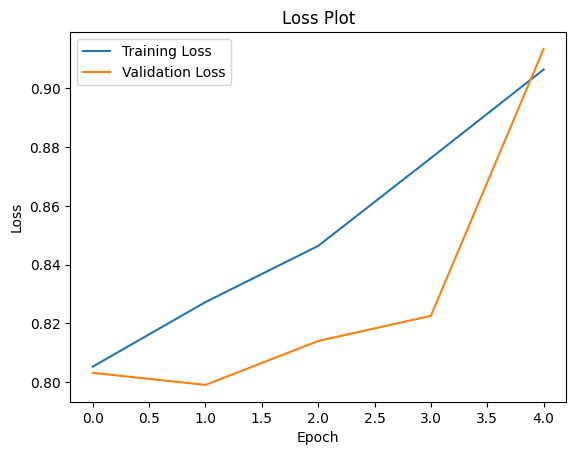

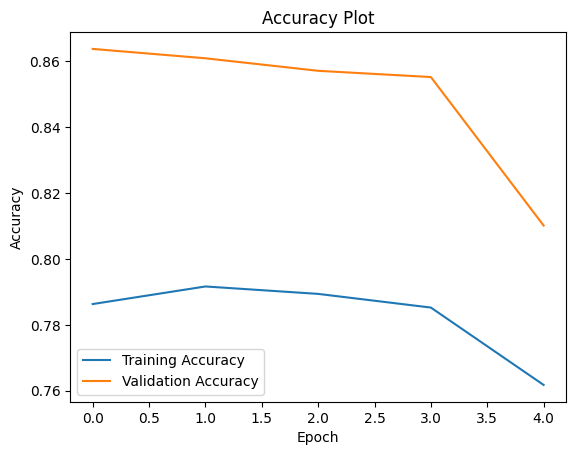

In [94]:
history_2 = model.fit(padded_latih, label_latih, epochs=5,
                    validation_data=(padded_test, label_test), verbose=2)


# Plot Loss
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Akurasi
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()